In [392]:
# GET NASDAQ TICKER DATA
import shutil
import urllib.request as request
from contextlib import closing

path_to_file = 'http://ftp.nasdaqtrader.com/dynamic/SymDir/nasdaqlisted.txt'
with closing(request.urlopen(path_to_file)) as r:
    with open('file', 'wb') as f:
        shutil.copyfileobj(r, f)

In [12]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from utils import get_dividends as get_divs
import matplotlib.pyplot as plt
import random
import seaborn as sns
import time

# To create datetime objects 
import datetime

# To grab stock data
import yfinance as fyf
from pandas_datareader import data as pdr
fyf.pdr_override() # <-- Here is the fix

SnP = ['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AAP', 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ARE', 'ALB', 'ALXN', 'ALGN', 'ALLE', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'RE', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FRC', 'FE', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL', 'GS', 'GWW', 'HRB', 'HAL', 'HBI', 'HOG', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HES', 'HPE', 'HLT', 'HFC', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MXIM', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MNST', 'MCO', 'MS', 'MSI', 'MSCI', 'MYL', 'NDAQ', 'NOV', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NLOK', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'ORLY', 'OXY', 'ODFL', 'OMC', 'OKE', 'ORCL', 'OTIS', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'QCOM', 'PWR', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STE', 'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'FTI', 'TFX', 'TXN', 'TXT', 'BK', 'CLX', 'COO', 'HSY', 'MOS', 'TRV', 'DIS', 'TMO', 'TIF', 'TJX', 'TSCO', 'TT', 'TDG', 'TFC', 'TWTR', 'TSN', 'USB', 'UDR', 'ULTA', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAC', 'V', 'VNO', 'VMC', 'WRB', 'WAB', 'WBA', 'WMT', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']
nasdaq = ['AACG', 'AAL', 'AAME', 'AAOI', 'AAON', 'AAPL', 'AAWW', 'AAXJ', 'AAXN', 'ABCB', 'ABEO', 'ABIO', 'ABMD', 'ABTX', 'ABUS', 'ACAD', 'ACAM', 'ACAMU', 'ACAMW', 'ACBI', 'ACER', 'ACGL', 'ACGLO', 'ACGLP', 'ACHC', 'ACHV', 'ACIA', 'ACIU', 'ACIW', 'ACLS', 'ACMR', 'ACNB', 'ACOR', 'ACRS', 'ACRX', 'ACST', 'ACT', 'ACTG', 'ACTT', 'ACTTU', 'ACTTW', 'ACWI', 'ACWX', 'ADAP', 'ADBE', 'ADES', 'ADI', 'ADIL', 'ADILW', 'ADMA', 'ADMP', 'ADMS', 'ADP', 'ADPT', 'ADRE', 'ADRO', 'ADSK', 'ADTN', 'ADUS', 'ADVM', 'ADXN', 'ADXS', 'AEGN', 'AEHR', 'AEIS', 'AEMD', 'AERI', 'AESE', 'AEY', 'AEYE', 'AEZS', 'AFH', 'AFIN', 'AFINP', 'AFMD', 'AFYA', 'AGBA', 'AGBAR', 'AGBAU', 'AGBAW', 'AGEN', 'AGFS', 'AGFSW', 'AGIO', 'AGLE', 'AGMH', 'AGNC', 'AGNCM', 'AGNCN', 'AGNCO', 'AGNCP', 'AGRX', 'AGTC', 'AGYS', 'AGZD', 'AHCO', 'AHPI', 'AIA', 'AIH', 'AIHS', 'AIKI', 'AIMC', 'AIMT', 'AINV', 'AIQ', 'AIRG', 'AIRR', 'AIRT', 'AIRTP', 'AIRTW', 'AKAM', 'AKBA', 'AKCA', 'AKER', 'AKRO', 'AKRX', 'AKTS', 'AKTX', 'ALAC', 'ALACR', 'ALACU', 'ALACW', 'ALBO', 'ALCO', 'ALDX', 'ALEC', 'ALGN', 'ALGT', 'ALIM', 'ALJJ', 'ALKS', 'ALLK', 'ALLO', 'ALLT', 'ALNA', 'ALNY', 'ALOT', 'ALPN', 'ALRM', 'ALRN', 'ALRS', 'ALSK', 'ALT', 'ALTM', 'ALTR', 'ALTY', 'ALXN', 'ALYA', 'AMAG', 'AMAL', 'AMAT', 'AMBA', 'AMCA', 'AMCI', 'AMCIU', 'AMCIW', 'AMCX', 'AMD', 'AMED', 'AMEH', 'AMGN', 'AMHC', 'AMHCU', 'AMHCW', 'AMKR', 'AMNB', 'AMOT', 'AMPH', 'AMRB', 'AMRH', 'AMRHW', 'AMRK', 'AMRN', 'AMRS', 'AMSC', 'AMSF', 'AMSWA', 'AMTB', 'AMTBB', 'AMTD', 'AMTX', 'AMWD', 'AMZN', 'ANAB', 'ANAT', 'ANCN', 'ANDA', 'ANDAR', 'ANDAU', 'ANDAW', 'ANDE', 'ANGI', 'ANGL', 'ANGO', 'ANIK', 'ANIP', 'ANIX', 'ANPC', 'ANSS', 'ANTE', 'ANY', 'AOBC', 'AOSL', 'APDN', 'APEI', 'APEN', 'APEX', 'APLS', 'APLT', 'APM', 'APOG', 'APOP', 'APOPW', 'APPF', 'APPN', 'APPS', 'APRE', 'APTO', 'APTX', 'APVO', 'APWC', 'APXT', 'APXTU', 'APXTW', 'APYX', 'AQB', 'AQMS', 'AQST', 'ARAV', 'ARAY', 'ARCB', 'ARCC', 'ARCE', 'ARCT', 'ARDS', 'ARDX', 'AREC', 'ARGX', 'ARKR', 'ARLP', 'ARNA', 'AROW', 'ARPO', 'ARQT', 'ARTL', 'ARTLW', 'ARTNA', 'ARTW', 'ARVN', 'ARWR', 'ARYA', 'ARYAU', 'ARYAW', 'ASET', 'ASFI', 'ASLN', 'ASMB', 'ASML', 'ASNA', 'ASND', 'ASPS', 'ASPU', 'ASRT', 'ASRV', 'ASRVP', 'ASTC', 'ASTE', 'ASUR', 'ASYS', 'ATAX', 'ATCX', 'ATCXW', 'ATEC', 'ATEX', 'ATHE', 'ATHX', 'ATIF', 'ATLC', 'ATLO', 'ATNI', 'ATNX', 'ATOM', 'ATOS', 'ATRA', 'ATRC', 'ATRI', 'ATRO', 'ATRS', 'ATSG', 'ATVI', 'ATXI', 'AUB', 'AUBN', 'AUDC', 'AUPH', 'AUTL', 'AUTO', 'AVAV', 'AVCO', 'AVCT', 'AVCTW', 'AVDL', 'AVEO', 'AVGO', 'AVGOP', 'AVGR', 'AVID', 'AVNW', 'AVRO', 'AVT', 'AVXL', 'AWRE', 'AXAS', 'AXDX', 'AXGN', 'AXGT', 'AXLA', 'AXNX', 'AXSM', 'AXTI', 'AY', 'AYLA', 'AYRO', 'AYTU', 'AZPN', 'AZRX', 'BAND', 'BANF', 'BANFP', 'BANR', 'BANX', 'BASI', 'BATRA', 'BATRK', 'BBBY', 'BBCP', 'BBGI', 'BBH', 'BBI', 'BBIO', 'BBQ', 'BBSI', 'BCBP', 'BCDA', 'BCDAW', 'BCEL', 'BCLI', 'BCML', 'BCOM', 'BCOR', 'BCOV', 'BCOW', 'BCPC', 'BCRX', 'BCTF', 'BCYC', 'BDGE', 'BDSI', 'BDTX', 'BEAM', 'BEAT', 'BECN', 'BELFA', 'BELFB', 'BFC', 'BFIN', 'BFIT', 'BFRA', 'BFST', 'BFYT', 'BGCP', 'BGFV', 'BGNE', 'BGRN', 'BHAT', 'BHF', 'BHFAL', 'BHFAO', 'BHFAP', 'BHTG', 'BIB', 'BICK', 'BIDU', 'BIIB', 'BILI', 'BIMI', 'BIOC', 'BIOL', 'BIS', 'BJK', 'BJRI', 'BKCC', 'BKEP', 'BKEPP', 'BKNG', 'BKSC', 'BKYI', 'BL', 'BLBD', 'BLCM', 'BLCN', 'BLDP', 'BLDR', 'BLFS', 'BLIN', 'BLKB', 'BLMN', 'BLNK', 'BLNKW', 'BLPH', 'BLRX', 'BLU', 'BLUE', 'BMCH', 'BMLP', 'BMRA', 'BMRC', 'BMRN', 'BMTC', 'BND', 'BNDW', 'BNDX', 'BNFT', 'BNGO', 'BNGOW', 'BNSO', 'BNTC', 'BNTX', 'BOCH', 'BOKF', 'BOKFL', 'BOMN', 'BOOM', 'BOSC', 'BOTJ', 'BOTZ', 'BOXL', 'BPFH', 'BPMC', 'BPOP', 'BPOPM', 'BPOPN', 'BPRN', 'BPTH', 'BPY', 'BPYPN', 'BPYPO', 'BPYPP', 'BPYU', 'BPYUP', 'BREW', 'BRID', 'BRKL', 'BRKR', 'BRKS', 'BROG', 'BROGW', 'BRP', 'BRPA', 'BRPAR', 'BRPAU', 'BRPAW', 'BRQS', 'BRY', 'BSAE', 'BSBE', 'BSBK', 'BSCE', 'BSCK', 'BSCL', 'BSCM', 'BSCN', 'BSCO', 'BSCP', 'BSCQ', 'BSCR', 'BSCS', 'BSCT', 'BSDE', 'BSET', 'BSGM', 'BSJK', 'BSJL', 'BSJM', 'BSJN', 'BSJO', 'BSJP', 'BSJQ', 'BSJR', 'BSML', 'BSMM', 'BSMN', 'BSMO', 'BSMP', 'BSMQ', 'BSMR', 'BSMS', 'BSMT', 'BSQR', 'BSRR', 'BSTC', 'BSVN', 'BTAI', 'BTEC', 'BUG', 'BUSE', 'BVXV', 'BWAY', 'BWB', 'BWEN', 'BWFG', 'BWMX', 'BXRX', 'BYFC', 'BYND', 'BYSI', 'BZUN', 'CAAS', 'CABA', 'CAC', 'CACC', 'CACG', 'CAKE', 'CALA', 'CALB', 'CALM', 'CAMP', 'CAMT', 'CAN', 'CAPR', 'CAR', 'CARA', 'CARE', 'CARG', 'CARV', 'CARZ', 'CASA', 'CASH', 'CASI', 'CASS', 'CASY', 'CATB', 'CATC', 'CATH', 'CATM', 'CATS', 'CATY', 'CBAN', 'CBAT', 'CBAY', 'CBFV', 'CBIO', 'CBLI', 'CBMB', 'CBMG', 'CBNK', 'CBPO', 'CBRL', 'CBSH', 'CBSHP', 'CBTX', 'CCAP', 'CCB', 'CCBG', 'CCCL', 'CCD', 'CCLP', 'CCMP', 'CCNC', 'CCNE', 'CCOI', 'CCRC', 'CCRN', 'CCXI', 'CDC', 'CDEV', 'CDK', 'CDL', 'CDLX', 'CDMO', 'CDMOP', 'CDNA', 'CDNS', 'CDTX', 'CDW', 'CDXC', 'CDXS', 'CDZI', 'CECE', 'CELC', 'CELH', 'CEMI', 'CENT', 'CENTA', 'CENX', 'CERC', 'CERN', 'CERS', 'CETV', 'CETX', 'CETXP', 'CETXW', 'CEVA', 'CEY', 'CEZ', 'CFA', 'CFB', 'CFBI', 'CFBK', 'CFFA', 'CFFAU', 'CFFAW', 'CFFI', 'CFFN', 'CFMS', 'CFO', 'CFRX', 'CG', 'CGBD', 'CGEN', 'CGIX', 'CGNX', 'CGO', 'CGROU', 'CHCI', 'CHCO', 'CHDN', 'CHEF', 'CHEK', 'CHEKZ', 'CHFS', 'CHI', 'CHKP', 'CHMA', 'CHMG', 'CHNA', 'CHNG', 'CHNGU', 'CHNR', 'CHPM', 'CHPMU', 'CHPMW', 'CHRS', 'CHRW', 'CHSCL', 'CHSCM', 'CHSCN', 'CHSCO', 'CHSCP', 'CHTR', 'CHUY', 'CHW', 'CHY', 'CIBR', 'CID', 'CIDM', 'CIGI', 'CIH', 'CIIC', 'CIICU', 'CIICW', 'CIL', 'CINF', 'CIVB', 'CIZ', 'CIZN', 'CJJD', 'CKPT', 'CLAR', 'CLBK', 'CLBS', 'CLCT', 'CLDB', 'CLDX', 'CLEU', 'CLFD', 'CLGN', 'CLIR', 'CLLS', 'CLMT', 'CLNE', 'CLOU', 'CLPS', 'CLPT', 'CLRB', 'CLRBZ', 'CLRG', 'CLRO', 'CLSD', 'CLSK', 'CLSN', 'CLUB', 'CLVS', 'CLWT', 'CLXT', 'CMBM', 'CMCO', 'CMCSA', 'CMCT', 'CMCTP', 'CME', 'CMFNL', 'CMLS', 'CMPR', 'CMRX', 'CMTL', 'CNBKA', 'CNCE', 'CNCR', 'CNDT', 'CNET', 'CNFR', 'CNFRL', 'CNNB', 'CNOB', 'CNSL', 'CNSP', 'CNST', 'CNTG', 'CNTY', 'CNXN', 'COCP', 'CODA', 'CODX', 'COFS', 'COHR', 'COHU', 'COKE', 'COLB', 'COLL', 'COLM', 'COMM', 'COMT', 'CONE', 'CONN', 'COOP', 'CORE', 'CORT', 'COST', 'COUP', 'COWN', 'COWNL', 'COWNZ', 'CPAA', 'CPAAU', 'CPAAW', 'CPAH', 'CPHC', 'CPIX', 'CPLP', 'CPRT', 'CPRX', 'CPSH', 'CPSI', 'CPSS', 'CPST', 'CPTA', 'CPTAG', 'CPTAL', 'CPZ', 'CRAI', 'CRBP', 'CRDF', 'CREE', 'CREG', 'CRESY', 'CREX', 'CREXW', 'CRIS', 'CRMT', 'CRNC', 'CRNT', 'CRNX', 'CRON', 'CROX', 'CRSA', 'CRSAU', 'CRSAW', 'CRSP', 'CRTO', 'CRTX', 'CRUS', 'CRVL', 'CRVS', 'CRWD', 'CRWS', 'CSA', 'CSB', 'CSBR', 'CSCO', 'CSF', 'CSFL', 'CSGP', 'CSGS', 'CSII', 'CSIQ', 'CSML', 'CSOD', 'CSPI', 'CSQ', 'CSSE', 'CSSEP', 'CSTE', 'CSTL', 'CSTR', 'CSWC', 'CSWCL', 'CSWI', 'CSX', 'CTAS', 'CTBI', 'CTG', 'CTHR', 'CTIB', 'CTIC', 'CTMX', 'CTRE', 'CTRM', 'CTRN', 'CTSH', 'CTSO', 'CTXR', 'CTXRW', 'CTXS', 'CUBA', 'CUE', 'CUTR', 'CVBF', 'CVCO', 'CVCY', 'CVET', 'CVGI', 'CVGW', 'CVLT', 'CVLY', 'CVTI', 'CVV', 'CWBC', 'CWBR', 'CWCO', 'CWST', 'CXDC', 'CXSE', 'CYAD', 'CYAN', 'CYBE', 'CYBR', 'CYCC', 'CYCCP', 'CYCN', 'CYRN', 'CYRX', 'CYRXW', 'CYTK', 'CZNC', 'CZR', 'CZWI', 'DAIO', 'DAKT', 'DALI', 'DARE', 'DAX', 'DBCP', 'DBVT', 'DBX', 'DCOM', 'DCOMP', 'DCPH', 'DCTH', 'DDIV', 'DDOG', 'DENN', 'DFFN', 'DFNL', 'DFPH', 'DFPHU', 'DFPHW', 'DGICA', 'DGICB', 'DGII', 'DGLD', 'DGLY', 'DGRE', 'DGRS', 'DGRW', 'DHC', 'DHCNI', 'DHCNL', 'DHIL', 'DINT', 'DIOD', 'DISCA', 'DISCB', 'DISCK', 'DISH', 'DJCO', 'DKNG', 'DKNGW', 'DLHC', 'DLPN', 'DLPNW', 'DLTH', 'DLTR', 'DMAC', 'DMLP', 'DMPI', 'DMRC', 'DMTK', 'DNJR', 'DNKN', 'DNLI', 'DOCU', 'DOGZ', 'DOMO', 'DOOO', 'DORM', 'DOX', 'DOYU', 'DPHC', 'DPHCU', 'DPHCW', 'DRAD', 'DRADP', 'DRIO', 'DRIOW', 'DRIV', 'DRNA', 'DRRX', 'DRTT', 'DSGX', 'DSKE', 'DSKEW', 'DSLV', 'DSPG', 'DSWL', 'DTEA', 'DTIL', 'DTSS', 'DUO', 'DUOT', 'DUSA', 'DVAX', 'DVLU', 'DVOL', 'DVY', 'DWAS', 'DWAT', 'DWAW', 'DWCR', 'DWEQ', 'DWFI', 'DWLD', 'DWMC', 'DWPP', 'DWSH', 'DWSN', 'DWUS', 'DXCM', 'DXGE', 'DXJS', 'DXLG', 'DXPE', 'DXYN', 'DYAI', 'DYNT', 'DZSI', 'EA', 'EARS', 'EAST', 'EBAY', 'EBAYL', 'EBIX', 'EBIZ', 'EBMT', 'EBSB', 'EBTC', 'ECHO', 'ECOL', 'ECOLW', 'ECOR', 'ECOW', 'ECPG', 'EDAP', 'EDIT', 'EDNT', 'EDRY', 'EDSA', 'EDUC', 'EEFT', 'EEMA', 'EFAS', 'EFOI', 'EFSC', 'EGAN', 'EGBN', 'EGLE', 'EGOV', 'EGRX', 'EH', 'EHTH', 'EIDX', 'EIGI', 'EIGR', 'EKSO', 'ELGX', 'ELOX', 'ELSE', 'ELTK', 'EMB', 'EMCB', 'EMCF', 'EMIF', 'EMKR', 'EML', 'EMXC', 'ENDP', 'ENG', 'ENLV', 'ENOB', 'ENPH', 'ENSG', 'ENT', 'ENTA', 'ENTG', 'ENTX', 'ENTXW', 'ENZL', 'EOLS', 'EPAY', 'EPIX', 'EPSN', 'EPZM', 'EQ', 'EQBK', 'EQIX', 'EQRR', 'ERI', 'ERIC', 'ERIE', 'ERII', 'ERYP', 'ESBK', 'ESCA', 'ESEA', 'ESGD', 'ESGE', 'ESGR', 'ESGRO', 'ESGRP', 'ESGU', 'ESLT', 'ESPO', 'ESPR', 'ESQ', 'ESSA', 'ESSC', 'ESSCR', 'ESSCU', 'ESSCW', 'ESTA', 'ESXB', 'ETFC', 'ETNB', 'ETON', 'ETSY', 'ETTX', 'EUFN', 'EVBG', 'EVER', 'EVFM', 'EVGBC', 'EVGN', 'EVK', 'EVLMC', 'EVLO', 'EVOK', 'EVOL', 'EVOP', 'EVSI', 'EVSIW', 'EVSTC', 'EWBC', 'EWJE', 'EWJV', 'EWZS', 'EXAS', 'EXC', 'EXEL', 'EXFO', 'EXLS', 'EXPC', 'EXPCU', 'EXPCW', 'EXPD', 'EXPE', 'EXPI', 'EXPO', 'EXTR', 'EYE', 'EYEG', 'EYEGW', 'EYEN', 'EYES', 'EYESW', 'EYPT', 'EZPW', 'FAAR', 'FAB', 'FAD', 'FALN', 'FAMI', 'FANG', 'FANH', 'FARM', 'FARO', 'FAST', 'FAT', 'FATE', 'FB', 'FBIO', 'FBIOP', 'FBIZ', 'FBMS', 'FBNC', 'FBSS', 'FBZ', 'FCA', 'FCAL', 'FCAN', 'FCAP', 'FCBC', 'FCBP', 'FCCO', 'FCCY', 'FCEF', 'FCEL', 'FCFS', 'FCNCA', 'FCNCP', 'FCVT', 'FDBC', 'FDEF', 'FDIV', 'FDNI', 'FDT', 'FDTS', 'FDUS', 'FDUSG', 'FDUSL', 'FDUSZ', 'FEIM', 'FELE', 'FEM', 'FEMB', 'FEMS', 'FENC', 'FEP', 'FEUZ', 'FEX', 'FEYE', 'FFBC', 'FFBW', 'FFHL', 'FFIC', 'FFIN', 'FFIV', 'FFNW', 'FFWM', 'FGBI', 'FGEN', 'FGM', 'FHB', 'FHK', 'FIBK', 'FID', 'FINX', 'FISI', 'FISV', 'FITB', 'FITBI', 'FITBO', 'FITBP', 'FIVE', 'FIVN', 'FIXD', 'FIXX', 'FIZZ', 'FJP', 'FKO', 'FKU', 'FLDM', 'FLEX', 'FLGT', 'FLIC', 'FLIR', 'FLL', 'FLMN', 'FLMNW', 'FLN', 'FLNT', 'FLWS', 'FLXN', 'FLXS', 'FMAO', 'FMB', 'FMBH', 'FMBI', 'FMCI', 'FMCIU', 'FMCIW', 'FMHI', 'FMK', 'FMNB', 'FNCB', 'FNHC', 'FNJN', 'FNK', 'FNKO', 'FNLC', 'FNWB', 'FNX', 'FNY', 'FOCS', 'FOLD', 'FONR', 'FORD', 'FORK', 'FORM', 'FORR', 'FORTY', 'FOSL', 'FOX', 'FOXA', 'FOXF', 'FPA', 'FPAY', 'FPRX', 'FPXE', 'FPXI', 'FRAF', 'FRAN', 'FRBA', 'FRBK', 'FREQ', 'FRG', 'FRGI', 'FRHC', 'FRME', 'FRPH', 'FRPT', 'FRSX', 'FRTA', 'FSBW', 'FSCT', 'FSEA', 'FSFG', 'FSLR', 'FSRV', 'FSRVU', 'FSRVW', 'FSTR', 'FSV', 'FSZ', 'FTA', 'FTAC', 'FTACU', 'FTACW', 'FTAG', 'FTC', 'FTCS', 'FTDR', 'FTEK', 'FTFT', 'FTGC', 'FTHI', 'FTLB', 'FTNT', 'FTRI', 'FTSL', 'FTSM', 'FTXD', 'FTXG', 'FTXH', 'FTXL', 'FTXN', 'FTXO', 'FTXR', 'FULC', 'FULT', 'FUNC', 'FUND', 'FUSB', 'FUTU', 'FUV', 'FV', 'FVC', 'FVCB', 'FVE', 'FWONA', 'FWONK', 'FWP', 'FWRD', 'FXNC', 'FYC', 'FYT', 'FYX', 'GABC', 'GAIA', 'GAIN', 'GAINL', 'GAINM', 'GALT', 'GAN', 'GARS', 'GASS', 'GBCI', 'GBDC', 'GBLI', 'GBLIL', 'GBLIZ', 'GBT', 'GCBC', 'GDEN', 'GDS', 'GDYN', 'GDYNW', 'GEC', 'GECC', 'GECCL', 'GECCM', 'GECCN', 'GENC', 'GENE', 'GENY', 'GEOS', 'GERN', 'GEVO', 'GFED', 'GFN', 'GFNCP', 'GFNSL', 'GGAL', 'GH', 'GHIV', 'GHIVU', 'GHIVW', 'GHSI', 'GIFI', 'GIGE', 'GIGM', 'GIII', 'GILD', 'GILT', 'GLAD', 'GLADD', 'GLADL', 'GLBS', 'GLBZ', 'GLDD', 'GLDI', 'GLG', 'GLIBA', 'GLIBP', 'GLMD', 'GLNG', 'GLPG', 'GLPI', 'GLRE', 'GLUU', 'GLYC', 'GMAB', 'GMBL', 'GMBLW', 'GMDA', 'GMHI', 'GMHIU', 'GMHIW', 'GMLP', 'GMLPP', 'GNCA', 'GNFT', 'GNLN', 'GNMA', 'GNMK', 'GNOM', 'GNPX', 'GNRS', 'GNRSU', 'GNRSW', 'GNSS', 'GNTX', 'GNTY', 'GNUS', 'GO', 'GOGL', 'GOGO', 'GOOD', 'GOODM', 'GOODN', 'GOOG', 'GOOGL', 'GOSS', 'GPAQ', 'GPAQU', 'GPAQW', 'GPOR', 'GPP', 'GPRE', 'GPRO', 'GRBK', 'GRFS', 'GRID', 'GRIF', 'GRIL', 'GRIN', 'GRMN', 'GRNQ', 'GRNV', 'GRNVR', 'GRNVU', 'GRNVW', 'GROW', 'GRPN', 'GRTS', 'GRTX', 'GRVY', 'GRWG', 'GSBC', 'GSHD', 'GSIT', 'GSKY', 'GSM', 'GSMG', 'GSMGW', 'GSUM', 'GT', 'GTEC', 'GTHX', 'GTIM', 'GTLS', 'GTYH', 'GURE', 'GVP', 'GWGH', 'GWPH', 'GWRS', 'GXGX', 'GXGXU', 'GXGXW', 'GXTG', 'GYRO', 'HA', 'HAFC', 'HAIN', 'HALL', 'HALO', 'HAPP', 'HARP', 'HAS', 'HAYN', 'HBAN', 'HBANN', 'HBANO', 'HBCP', 'HBIO', 'HBMD', 'HBNC', 'HBP', 'HBT', 'HCAC', 'HCACU', 'HCACW', 'HCAP', 'HCAPZ', 'HCAT', 'HCCH', 'HCCHR', 'HCCHU', 'HCCHW', 'HCCI', 'HCCO', 'HCCOU', 'HCCOW', 'HCKT', 'HCM', 'HCSG', 'HDS', 'HDSN', 'HEAR', 'HEBT', 'HEES', 'HELE', 'HEPA', 'HERD', 'HERO', 'HEWG', 'HFBL', 'HFFG', 'HFWA', 'HGSH', 'HHR', 'HHT', 'HIBB', 'HIFS', 'HIHO', 'HIMX', 'HJLI', 'HJLIW', 'HLAL', 'HLG', 'HLIO', 'HLIT', 'HLNE', 'HMHC', 'HMNF', 'HMST', 'HMSY', 'HMTV', 'HNDL', 'HNNA', 'HNRG', 'HOFT', 'HOLI', 'HOLX', 'HOMB', 'HONE', 'HOOK', 'HOPE', 'HOTH', 'HOVNP', 'HQI', 'HQY', 'HROW', 'HRTX', 'HRZN', 'HSDT', 'HSIC', 'HSII', 'HSKA', 'HSON', 'HSTM', 'HSTO', 'HTBI', 'HTBK', 'HTBX', 'HTGM', 'HTHT', 'HTIA', 'HTLD', 'HTLF', 'HUBG', 'HUGE', 'HUIZ', 'HURC', 'HURN', 'HUSN', 'HVBC', 'HWBK', 'HWC', 'HWCC', 'HWCPL', 'HWKN', 'HX', 'HYAC', 'HYACU', 'HYACW', 'HYLS', 'HYRE', 'HYXE', 'HYZD', 'HZNP', 'IAC', 'IART', 'IBB', 'IBCP', 'IBKC', 'IBKCN', 'IBKCO', 'IBKCP', 'IBKR', 'IBOC', 'IBTA', 'IBTB', 'IBTD', 'IBTE', 'IBTF', 'IBTG', 'IBTH', 'IBTI', 'IBTJ', 'IBTX', 'IBUY', 'ICAD', 'ICBK', 'ICCC', 'ICCH', 'ICFI', 'ICHR', 'ICLK', 'ICLN', 'ICLR', 'ICMB', 'ICON', 'ICPT', 'ICUI', 'IDCC', 'IDEX', 'IDLB', 'IDN', 'IDRA', 'IDXG', 'IDXX', 'IDYA', 'IEA', 'IEAWW', 'IEC', 'IEF', 'IEI', 'IEP', 'IESC', 'IEUS', 'IFEU', 'IFGL', 'IFMK', 'IFRX', 'IFV', 'IGF', 'IGIB', 'IGIC', 'IGICW', 'IGMS', 'IGOV', 'IGSB', 'IHRT', 'III', 'IIIN', 'IIIV', 'IIN', 'IIVI', 'IJT', 'IKNX', 'ILMN', 'ILPT', 'IMAB', 'IMAC', 'IMACW', 'IMBI', 'IMGN', 'IMKTA', 'IMMP', 'IMMR', 'IMMU', 'IMOS', 'IMRA', 'IMRN', 'IMRNW', 'IMTE', 'IMUX', 'IMV', 'IMVT', 'IMVTU', 'IMVTW', 'IMXI', 'INBK', 'INBKL', 'INBKZ', 'INCY', 'INDB', 'INDY', 'INFI', 'INFN', 'INFR', 'INGN', 'INMB', 'INMD', 'INO', 'INOD', 'INOV', 'INPX', 'INSE', 'INSG', 'INSM', 'INSU', 'INSUU', 'INSUW', 'INTC', 'INTG', 'INTL', 'INTU', 'INVA', 'INVE', 'INWK', 'IONS', 'IOSP', 'IOTS', 'IOVA', 'IPAR', 'IPDN', 'IPGP', 'IPHA', 'IPKW', 'IPLDP', 'IPWR', 'IQ', 'IRBT', 'IRCP', 'IRDM', 'IRIX', 'IRMD', 'IROQ', 'IRTC', 'IRWD', 'ISBC', 'ISDS', 'ISDX', 'ISEE', 'ISEM', 'ISHG', 'ISIG', 'ISNS', 'ISRG', 'ISSC', 'ISTB', 'ISTR', 'ITCI', 'ITI', 'ITIC', 'ITMR', 'ITRI', 'ITRM', 'ITRN', 'IUS', 'IUSB', 'IUSG', 'IUSS', 'IUSV', 'IVAC', 'IXUS', 'IZEA', 'JACK', 'JAGX', 'JAKK', 'JAN', 'JAZZ', 'JBHT', 'JBLU', 'JBSS', 'JCOM', 'JCS', 'JCTCF', 'JD', 'JFIN', 'JFK', 'JFKKR', 'JFKKU', 'JFKKW', 'JFU', 'JG', 'JJSF', 'JKHY', 'JKI', 'JMPNL', 'JMPNZ', 'JNCE', 'JOBS', 'JOUT', 'JRJC', 'JRSH', 'JRVR', 'JSM', 'JSMD', 'JSML', 'JVA', 'JYNT', 'KALA', 'KALU', 'KALV', 'KBAL', 'KBLM', 'KBLMR', 'KBLMU', 'KBLMW', 'KBSF', 'KBWB', 'KBWD', 'KBWP', 'KBWR', 'KBWY', 'KC', 'KCAPL', 'KE', 'KELYA', 'KELYB', 'KEQU', 'KERN', 'KERNW', 'KFFB', 'KFRC', 'KGJI', 'KHC', 'KIDS', 'KIN', 'KINS', 'KIRK', 'KLAC', 'KLDO', 'KLIC', 'KLXE', 'KMDA', 'KNDI', 'KNSA', 'KNSL', 'KOD', 'KOPN', 'KOSS', 'KPTI', 'KRKR', 'KRMA', 'KRMD', 'KRNT', 'KRNY', 'KROS', 'KRTX', 'KRUS', 'KRYS', 'KTCC', 'KTOS', 'KTOV', 'KTOVW', 'KURA', 'KVHI', 'KXIN', 'KZIA', 'KZR', 'LACQ', 'LACQU', 'LACQW', 'LAKE', 'LAMR', 'LANC', 'LAND', 'LANDP', 'LARK', 'LASR', 'LATN', 'LATNU', 'LATNW', 'LAUR', 'LAWS', 'LAZY', 'LBAI', 'LBC', 'LBRDA', 'LBRDK', 'LBTYA', 'LBTYB', 'LBTYK', 'LCA', 'LCAHU', 'LCAHW', 'LCNB', 'LCUT', 'LDEM', 'LDSF', 'LE', 'LECO', 'LEDS', 'LEGH', 'LEGR', 'LEVL', 'LFAC', 'LFACU', 'LFACW', 'LFUS', 'LFVN', 'LGIH', 'LGND', 'LHCG', 'LIFE', 'LILA', 'LILAK', 'LINC', 'LIND', 'LIQT', 'LITE', 'LIVE', 'LIVK', 'LIVKU', 'LIVKW', 'LIVN', 'LIVX', 'LIZI', 'LJPC', 'LK', 'LKCO', 'LKFN', 'LKQ', 'LLIT', 'LLNW', 'LMAT', 'LMB', 'LMBS', 'LMFA', 'LMFAW', 'LMNL', 'LMNR', 'LMNX', 'LMPX', 'LMRK', 'LMRKN', 'LMRKO', 'LMRKP', 'LMST', 'LNDC', 'LNGR', 'LNT', 'LNTH', 'LOAC', 'LOACR', 'LOACU', 'LOACW', 'LOAN', 'LOB', 'LOCO', 'LOGC', 'LOGI', 'LOGM', 'LONE', 'LOOP', 'LOPE', 'LORL', 'LOVE', 'LPCN', 'LPLA', 'LPSN', 'LPTH', 'LPTX', 'LQDA', 'LQDT', 'LRCX', 'LRGE', 'LRMR', 'LSAC', 'LSACU', 'LSACW', 'LSBK', 'LSCC', 'LSTR', 'LSXMA', 'LSXMB', 'LSXMK', 'LSXMR', 'LTBR', 'LTRPA', 'LTRPB', 'LTRX', 'LULU', 'LUMO', 'LUNA', 'LVGO', 'LVHD', 'LWAY', 'LX', 'LXRX', 'LYFT', 'LYL', 'LYRA', 'LYTS', 'MACK', 'MAGS', 'MANH', 'MANT', 'MAR', 'MARA', 'MARK', 'MARPS', 'MASI', 'MAT', 'MATW', 'MAYS', 'MBB', 'MBCN', 'MBII', 'MBIN', 'MBINO', 'MBINP', 'MBIO', 'MBNKP', 'MBOT', 'MBRX', 'MBSD', 'MBUU', 'MBWM', 'MCBC', 'MCBS', 'MCEF', 'MCEP', 'MCFT', 'MCHI', 'MCHP', 'MCHX', 'MCMJ', 'MCMJW', 'MCRB', 'MCRI', 'MDB', 'MDCA', 'MDGL', 'MDGS', 'MDGSW', 'MDIA', 'MDIV', 'MDJH', 'MDLZ', 'MDRR', 'MDRRP', 'MDRX', 'MDWD', 'MEDP', 'MEDS', 'MEET', 'MEIP', 'MELI', 'MEOH', 'MERC', 'MESA', 'MESO', 'METC', 'METX', 'METXW', 'MFH', 'MFIN', 'MFINL', 'MFNC', 'MGEE', 'MGEN', 'MGI', 'MGIC', 'MGLN', 'MGNX', 'MGPI', 'MGRC', 'MGTA', 'MGTX', 'MGYR', 'MHLD', 'MICT', 'MIDD', 'MIK', 'MILN', 'MIME', 'MIND', 'MINDP', 'MINI', 'MIRM', 'MIST', 'MITK', 'MITO', 'MJCO', 'MKD', 'MKGI', 'MKSI', 'MKTX', 'MLAB', 'MLCO', 'MLHR', 'MLND', 'MLVF', 'MMAC', 'MMLP', 'MMSI', 'MMYT', 'MNCL', 'MNCLU', 'MNCLW', 'MNDO', 'MNKD', 'MNLO', 'MNOV', 'MNPR', 'MNRO', 'MNSB', 'MNST', 'MNTA', 'MNTX', 'MOBL', 'MOFG', 'MOGO', 'MOHO', 'MOMO', 'MOR', 'MORF', 'MORN', 'MOSY', 'MOTS', 'MOXC', 'MPAA', 'MPB', 'MPWR', 'MRAM', 'MRBK', 'MRCC', 'MRCCL', 'MRCY', 'MREO', 'MRIN', 'MRKR', 'MRLN', 'MRNA', 'MRNS', 'MRSN', 'MRTN', 'MRTX', 'MRUS', 'MRVL', 'MSBF', 'MSBI', 'MSEX', 'MSFT', 'MSON', 'MSTR', 'MSVB', 'MTBC', 'MTBCP', 'MTC', 'MTCH', 'MTEM', 'MTEX', 'MTLS', 'MTP', 'MTRX', 'MTSC', 'MTSI', 'MTSL', 'MU', 'MUDS', 'MUDSU', 'MUDSW', 'MVBF', 'MVIS', 'MWK', 'MXIM', 'MYFW', 'MYGN', 'MYL', 'MYOK', 'MYOS', 'MYRG', 'MYSZ', 'MYT', 'NAII', 'NAKD', 'NAOV', 'NARI', 'NATH', 'NATI', 'NATR', 'NAVI', 'NBAC', 'NBACR', 'NBACU', 'NBACW', 'NBEV', 'NBIX', 'NBL', 'NBLX', 'NBN', 'NBRV', 'NBSE', 'NBTB', 'NCBS', 'NCMI', 'NCNA', 'NCSM', 'NCTY', 'NDAQ', 'NDLS', 'NDRA', 'NDRAW', 'NDSN', 'NEBU', 'NEBUU', 'NEBUW', 'NEO', 'NEOG', 'NEON', 'NEOS', 'NEPH', 'NEPT', 'NERV', 'NESR', 'NESRW', 'NETE', 'NEWA', 'NEWT', 'NEWTI', 'NEWTL', 'NEXT', 'NFBK', 'NFE', 'NFIN', 'NFINU', 'NFINW', 'NFLX', 'NFTY', 'NGHC', 'NGHCN', 'NGHCO', 'NGHCP', 'NGHCZ', 'NGM', 'NH', 'NHLD', 'NHLDW', 'NHTC', 'NICE', 'NICK', 'NIU', 'NK', 'NKSH', 'NKTR', 'NLOK', 'NLTX', 'NMCI', 'NMIH', 'NMRD', 'NMRK', 'NMTR', 'NNBR', 'NNDM', 'NODK', 'NOVN', 'NOVSU', 'NOVT', 'NPA', 'NPAUU', 'NPAWW', 'NRBO', 'NRC', 'NRIM', 'NSEC', 'NSIT', 'NSSC', 'NSTG', 'NSYS', 'NTAP', 'NTCT', 'NTEC', 'NTES', 'NTGR', 'NTIC', 'NTLA', 'NTNX', 'NTRA', 'NTRP', 'NTRS', 'NTRSO', 'NTUS', 'NTWK', 'NUAN', 'NURO', 'NUVA', 'NVAX', 'NVCN', 'NVCR', 'NVDA', 'NVEC', 'NVEE', 'NVFY', 'NVIV', 'NVMI', 'NVUS', 'NWBI', 'NWFL', 'NWGI', 'NWL', 'NWLI', 'NWPX', 'NWS', 'NWSA', 'NXGN', 'NXPI', 'NXST', 'NXTC', 'NXTD', 'NXTG', 'NYMT', 'NYMTM', 'NYMTN', 'NYMTO', 'NYMTP', 'NYMX', 'OAS', 'OBAS', 'OBCI', 'OBLN', 'OBNK', 'OBSV', 'OCC', 'OCCI', 'OCCIP', 'OCFC', 'OCFCP', 'OCGN', 'OCSI', 'OCSL', 'OCUL', 'ODFL', 'ODP', 'ODT', 'OEG', 'OESX', 'OFED', 'OFIX', 'OFLX', 'OFS', 'OFSSI', 'OFSSL', 'OFSSZ', 'OGI', 'OIIM', 'OKTA', 'OLD', 'OLED', 'OLLI', 'OMAB', 'OMCL', 'OMER', 'OMEX', 'OMP', 'ON', 'ONB', 'ONCS', 'ONCT', 'ONCY', 'ONEM', 'ONEQ', 'ONEW', 'ONTX', 'ONTXW', 'ONVO', 'OPB', 'OPBK', 'OPCH', 'OPES', 'OPESU', 'OPESW', 'OPGN', 'OPHC', 'OPI', 'OPINI', 'OPK', 'OPNT', 'OPOF', 'OPRA', 'OPRT', 'OPRX', 'OPTN', 'OPTT', 'ORBC', 'ORGO', 'ORGS', 'ORIC', 'ORLY', 'ORMP', 'ORRF', 'ORSN', 'ORSNR', 'ORSNU', 'ORSNW', 'ORTX', 'OSBC', 'OSIS', 'OSMT', 'OSN', 'OSPN', 'OSS', 'OSTK', 'OSUR', 'OSW', 'OTEL', 'OTEX', 'OTIC', 'OTLK', 'OTLKW', 'OTTR', 'OTTW', 'OVBC', 'OVID', 'OVLY', 'OXBR', 'OXBRW', 'OXFD', 'OXLC', 'OXLCM', 'OXLCO', 'OXLCP', 'OXSQ', 'OXSQL', 'OXSQZ', 'OYST', 'OZK', 'PAAC', 'PAACR', 'PAACU', 'PAACW', 'PAAS', 'PACB', 'PACQ', 'PACQU', 'PACQW', 'PACW', 'PAE', 'PAEWW', 'PAHC', 'PANL', 'PASG', 'PATI', 'PATK', 'PAVM', 'PAVMW', 'PAVMZ', 'PAYS', 'PAYX', 'PBCT', 'PBCTP', 'PBFS', 'PBHC', 'PBIP', 'PBPB', 'PBTS', 'PBYI', 'PCAR', 'PCB', 'PCH', 'PCOM', 'PCRX', 'PCSB', 'PCTI', 'PCTY', 'PCYG', 'PCYO', 'PDBC', 'PDCE', 'PDCO', 'PDD', 'PDEV', 'PDEX', 'PDFS', 'PDLB', 'PDLI', 'PDP', 'PDSB', 'PEBK', 'PEBO', 'PECK', 'PEGA', 'PEIX', 'PENN', 'PEP', 'PERI', 'PESI', 'PETQ', 'PETS', 'PETZ', 'PEY', 'PEZ', 'PFBC', 'PFBI', 'PFF', 'PFG', 'PFHD', 'PFI', 'PFIE', 'PFIN', 'PFIS', 'PFLT', 'PFM', 'PFMT', 'PFPT', 'PFSW', 'PGC', 'PGEN', 'PGJ', 'PGNX', 'PGNY', 'PHAS', 'PHAT', 'PHCF', 'PHIO', 'PHIOW', 'PHO', 'PHUN', 'PHUNW', 'PI', 'PICO', 'PID', 'PIE', 'PIH', 'PIHPP', 'PINC', 'PIO', 'PIRS', 'PIXY', 'PIZ', 'PKBK', 'PKOH', 'PKW', 'PLAB', 'PLAY', 'PLBC', 'PLC', 'PLCE', 'PLIN', 'PLL', 'PLMR', 'PLPC', 'PLSE', 'PLUG', 'PLUS', 'PLW', 'PLXP', 'PLXS', 'PLYA', 'PMBC', 'PMD', 'PME', 'PMOM', 'PNBK', 'PNFP', 'PNNT', 'PNNTG', 'PNQI', 'PNRG', 'PNTG', 'POAI', 'PODD', 'POLA', 'POOL', 'POTX', 'POWI', 'POWL', 'PPBI', 'PPC', 'PPD', 'PPH', 'PPHI', 'PPIH', 'PPSI', 'PRAA', 'PRAH', 'PRCP', 'PRDO', 'PRFT', 'PRFZ', 'PRGS', 'PRGX', 'PRIM', 'PRN', 'PRNB', 'PROF', 'PROV', 'PRPH', 'PRPL', 'PRPO', 'PRQR', 'PRSC', 'PRTA', 'PRTH', 'PRTK', 'PRTS', 'PRVB', 'PRVL', 'PS', 'PSC', 'PSCC', 'PSCD', 'PSCE', 'PSCF', 'PSCH', 'PSCI', 'PSCM', 'PSCT', 'PSCU', 'PSEC', 'PSET', 'PSHG', 'PSL', 'PSM', 'PSMT', 'PSNL', 'PSTI', 'PSTV', 'PT', 'PTAC', 'PTACU', 'PTACW', 'PTC', 'PTCT', 'PTE', 'PTEN', 'PTF', 'PTGX', 'PTH', 'PTI', 'PTLA', 'PTMN', 'PTNR', 'PTON', 'PTSI', 'PTVCA', 'PTVCB', 'PUB', 'PUI', 'PULM', 'PUYI', 'PVAC', 'PVAL', 'PVBC', 'PWFL', 'PWOD', 'PXI', 'PXLW', 'PXS', 'PY', 'PYPL', 'PYZ', 'PZZA', 'QABA', 'QADA', 'QADB', 'QAT', 'QCLN', 'QCOM', 'QCRH', 'QDEL', 'QFIN', 'QIWI', 'QK', 'QLGN', 'QLYS', 'QMCO', 'QNST', 'QQEW', 'QQQ', 'QQQX', 'QQXT', 'QRHC', 'QRTEA', 'QRTEB', 'QRVO', 'QTEC', 'QTNT', 'QTRX', 'QTT', 'QUIK', 'QUMU', 'QURE', 'QYLD', 'RADA', 'RAIL', 'RAND', 'RAPT', 'RARE', 'RAVE', 'RAVN', 'RBB', 'RBBN', 'RBCAA', 'RBCN', 'RBKB', 'RBNC', 'RCEL', 'RCII', 'RCKT', 'RCKY', 'RCM', 'RCMT', 'RCON', 'RDCM', 'RDFN', 'RDHL', 'RDI', 'RDIB', 'RDNT', 'RDUS', 'RDVT', 'RDVY', 'RDWR', 'REAL', 'REDU', 'REED', 'REFR', 'REG', 'REGI', 'REGN', 'REKR', 'RELL', 'RELV', 'REPH', 'REPL', 'RESN', 'RETA', 'RETO', 'REXN', 'REYN', 'RFAP', 'RFDI', 'RFEM', 'RFEU', 'RFIL', 'RGCO', 'RGEN', 'RGLD', 'RGLS', 'RGNX', 'RGP', 'RIBT', 'RICK', 'RIGL', 'RILY', 'RILYG', 'RILYH', 'RILYI', 'RILYM', 'RILYN', 'RILYO', 'RILYP', 'RILYZ', 'RING', 'RIOT', 'RIVE', 'RKDA', 'RLMD', 'RMBI', 'RMBL', 'RMBS', 'RMCF', 'RMNI', 'RMR', 'RMTI', 'RNDB', 'RNDM', 'RNDV', 'RNEM', 'RNET', 'RNLC', 'RNMC', 'RNSC', 'RNST', 'RNWK', 'ROAD', 'ROBT', 'ROCHU', 'ROCK', 'ROIC', 'ROKU', 'ROLL', 'ROSE', 'ROSEU', 'ROSEW', 'ROST', 'RP', 'RPAY', 'RPD', 'RRBI', 'RRGB', 'RRR', 'RSSS', 'RTH', 'RTIX', 'RTLR', 'RTRX', 'RUBY', 'RUHN', 'RUN', 'RUSHA', 'RUSHB', 'RUTH', 'RVMD', 'RVNC', 'RVSB', 'RWLK', 'RYAAY', 'RYTM', 'SABR', 'SAEX', 'SAFM', 'SAFT', 'SAGE', 'SAIA', 'SAL', 'SALM', 'SAMA', 'SAMAU', 'SAMAW', 'SAMG', 'SANM', 'SANW', 'SAQN', 'SAQNU', 'SAQNW', 'SASR', 'SATS', 'SAVA', 'SBAC', 'SBBP', 'SBBX', 'SBCF', 'SBFG', 'SBGI', 'SBLK', 'SBLKZ', 'SBNY', 'SBPH', 'SBRA', 'SBSI', 'SBT', 'SBUX', 'SCHL', 'SCHN', 'SCKT', 'SCON', 'SCOR', 'SCPH', 'SCPL', 'SCSC', 'SCVL', 'SCWX', 'SCYX', 'SCZ', 'SDC', 'SDG', 'SDGR', 'SDVY', 'SEAC', 'SECO', 'SEDG', 'SEED', 'SEEL', 'SEIC', 'SELB', 'SELF', 'SENEA', 'SENEB', 'SESN', 'SFBC', 'SFBS', 'SFET', 'SFIX', 'SFM', 'SFNC', 'SFST', 'SG', 'SGA', 'SGBX', 'SGC', 'SGEN', 'SGH', 'SGLB', 'SGLBW', 'SGMA', 'SGMO', 'SGMS', 'SGOC', 'SGRP', 'SGRY', 'SHBI', 'SHEN', 'SHIP', 'SHIPW', 'SHIPZ', 'SHLO', 'SHOO', 'SHSP', 'SHV', 'SHY', 'SIBN', 'SIC', 'SIEB', 'SIEN', 'SIFY', 'SIGA', 'SIGI', 'SILC', 'SILK', 'SIMO', 'SINA', 'SINO', 'SINT', 'SIRI', 'SITM', 'SIVB', 'SIVBP', 'SJ', 'SJOYW', 'SKOR', 'SKYS', 'SKYW', 'SKYY', 'SLAB', 'SLCT', 'SLDB', 'SLGG', 'SLGL', 'SLGN', 'SLM', 'SLMBP', 'SLNO', 'SLP', 'SLQD', 'SLRC', 'SLRX', 'SLS', 'SLVO', 'SMBC', 'SMBK', 'SMCI', 'SMCP', 'SMED', 'SMH', 'SMIT', 'SMMC', 'SMMCU', 'SMMCW', 'SMMF', 'SMMT', 'SMPL', 'SMRT', 'SMSI', 'SMTC', 'SMTX', 'SNBR', 'SNCA', 'SNCR', 'SND', 'SNDE', 'SNDL', 'SNDX', 'SNES', 'SNFCA', 'SNGX', 'SNGXW', 'SNLN', 'SNOA', 'SNPS', 'SNSR', 'SNSS', 'SNUG', 'SNY', 'SOCL', 'SOHO', 'SOHOB', 'SOHON', 'SOHOO', 'SOHU', 'SOLO', 'SOLOW', 'SOLY', 'SONA', 'SONM', 'SONN', 'SONO', 'SOXX', 'SP', 'SPAR', 'SPCB', 'SPFI', 'SPI', 'SPKE', 'SPKEP', 'SPLK', 'SPNE', 'SPNS', 'SPOK', 'SPPI', 'SPRO', 'SPRT', 'SPSC', 'SPT', 'SPTN', 'SPWH', 'SPWR', 'SQBG', 'SQLV', 'SQQQ', 'SRAC', 'SRACU', 'SRACW', 'SRAX', 'SRCE', 'SRCL', 'SRDX', 'SRET', 'SREV', 'SRNE', 'SRPT', 'SRRA', 'SRRK', 'SRTS', 'SRTSW', 'SSB', 'SSBI', 'SSKN', 'SSNC', 'SSNT', 'SSP', 'SSPK', 'SSPKU', 'SSPKW', 'SSRM', 'SSSS', 'SSTI', 'SSYS', 'STAA', 'STAF', 'STAY', 'STBA', 'STCN', 'STFC', 'STIM', 'STKL', 'STKS', 'STLD', 'STML', 'STMP', 'STND', 'STNE', 'STOK', 'STRA', 'STRL', 'STRM', 'STRO', 'STRS', 'STRT', 'STSA', 'STX', 'STXB', 'SUMR', 'SUNS', 'SUNW', 'SUPN', 'SURF', 'SUSB', 'SUSC', 'SUSL', 'SVA', 'SVBI', 'SVC', 'SVMK', 'SVRA', 'SVVC', 'SWAV', 'SWIR', 'SWKH', 'SWKS', 'SWTX', 'SXTC', 'SY', 'SYBT', 'SYBX', 'SYKE', 'SYNA', 'SYNC', 'SYNH', 'SYNL', 'SYPR', 'SYRS', 'TA', 'TACO', 'TACOW', 'TACT', 'TAIT', 'TANH', 'TANNI', 'TANNL', 'TANNZ', 'TAOP', 'TARA', 'TAST', 'TATT', 'TAYD', 'TBBK', 'TBIO', 'TBK', 'TBLT', 'TBLTW', 'TBNK', 'TBPH', 'TC', 'TCBI', 'TCBIL', 'TCBIP', 'TCBK', 'TCCO', 'TCDA', 'TCF', 'TCFC', 'TCFCP', 'TCMD', 'TCOM', 'TCON', 'TCPC', 'TCRD', 'TCRR', 'TCX', 'TDAC', 'TDACU', 'TDACW', 'TDIV', 'TEAM', 'TECD', 'TECH', 'TECTP', 'TEDU', 'TELA', 'TELL', 'TENB', 'TENX', 'TER', 'TERP', 'TESS', 'TEUM', 'TFFP', 'TFSL', 'TGA', 'TGEN', 'TGLS', 'TGTX', 'TH', 'THBR', 'THBRU', 'THBRW', 'THCA', 'THCAU', 'THCAW', 'THCB', 'THCBU', 'THCBW', 'THFF', 'THMO', 'THRM', 'THTX', 'THWWW', 'TIGO', 'TIGR', 'TILE', 'TIPT', 'TITN', 'TIVO', 'TLC', 'TLF', 'TLGT', 'TLND', 'TLRY', 'TLSA', 'TLT', 'TMDI', 'TMDX', 'TMUS', 'TNAV', 'TNDM', 'TNXP', 'TOCA', 'TOPS', 'TORC', 'TOTA', 'TOTAR', 'TOTAU', 'TOTAW', 'TOUR', 'TOWN', 'TPCO', 'TPIC', 'TPTX', 'TQQQ', 'TRCH', 'TREE', 'TRHC', 'TRIB', 'TRIL', 'TRIP', 'TRMB', 'TRMD', 'TRMK', 'TRMT', 'TRNS', 'TROW', 'TRPX', 'TRS', 'TRST', 'TRUE', 'TRUP', 'TRVG', 'TRVI', 'TRVN', 'TSBK', 'TSC', 'TSCAP', 'TSCBP', 'TSCO', 'TSEM', 'TSLA', 'TSRI', 'TTD', 'TTEC', 'TTEK', 'TTGT', 'TTMI', 'TTNP', 'TTOO', 'TTPH', 'TTTN', 'TTWO', 'TUES', 'TUR', 'TURN', 'TUSA', 'TUSK', 'TVIX', 'TVTY', 'TW', 'TWIN', 'TWMC', 'TWNK', 'TWNKW', 'TWOU', 'TWST', 'TXG', 'TXMD', 'TXN', 'TXRH', 'TYHT', 'TYME', 'TZAC', 'TZACU', 'TZACW', 'TZOO', 'UAE', 'UAL', 'UBCP', 'UBFO', 'UBOH', 'UBSI', 'UBX', 'UCBI', 'UCTT', 'UEIC', 'UEPS', 'UFCS', 'UFO', 'UFPI', 'UFPT', 'UG', 'UGLD', 'UHAL', 'UIHC', 'ULBI', 'ULH', 'ULTA', 'UMBF', 'UMPQ', 'UMRX', 'UNAM', 'UNB', 'UNIT', 'UNTY', 'UONE', 'UONEK', 'UPLD', 'UPWK', 'URBN', 'URGN', 'UROV', 'USAK', 'USAP', 'USAU', 'USCR', 'USEG', 'USIG', 'USIO', 'USLB', 'USLM', 'USLV', 'USMC', 'USOI', 'USWS', 'USWSW', 'UTHR', 'UTMD', 'UTSI', 'UVSP', 'UXIN', 'VALU', 'VBFC', 'VBIV', 'VBLT', 'VBTX', 'VC', 'VCEL', 'VCIT', 'VCLT', 'VCNX', 'VCSH', 'VCTR', 'VCYT', 'VECO', 'VEON', 'VERB', 'VERBW', 'VERI', 'VERO', 'VERU', 'VERY', 'VETS', 'VFF', 'VG', 'VGIT', 'VGLT', 'VGSH', 'VIAC', 'VIACA', 'VIAV', 'VICR', 'VIE', 'VIGI', 'VIIX', 'VIOT', 'VIR', 'VIRC', 'VIRT', 'VISL', 'VIVE', 'VIVO', 'VKTX', 'VKTXW', 'VLGEA', 'VLY', 'VLYPO', 'VLYPP', 'VMBS', 'VMD', 'VNDA', 'VNET', 'VNOM', 'VNQI', 'VOD', 'VONE', 'VONG', 'VONV', 'VOXX', 'VRA', 'VRAY', 'VRCA', 'VREX', 'VRIG', 'VRML', 'VRNA', 'VRNS', 'VRNT', 'VRRM', 'VRSK', 'VRSN', 'VRTS', 'VRTU', 'VRTX', 'VSAT', 'VSDA', 'VSEC', 'VSMV', 'VSTM', 'VTC', 'VTGN', 'VTHR', 'VTIP', 'VTIQ', 'VTIQU', 'VTIQW', 'VTNR', 'VTSI', 'VTVT', 'VTWG', 'VTWO', 'VTWV', 'VUZI', 'VVPR', 'VVUS', 'VWOB', 'VXRT', 'VXUS', 'VYGR', 'VYMI', 'WABC', 'WAFD', 'WAFU', 'WASH', 'WATT', 'WB', 'WBA', 'WBND', 'WCLD', 'WDAY', 'WDC', 'WDFC', 'WEBK', 'WEN', 'WERN', 'WETF', 'WEYS', 'WHF', 'WHFBZ', 'WHLM', 'WHLR', 'WHLRD', 'WHLRP', 'WIFI', 'WILC', 'WIMI', 'WINA', 'WINC', 'WING', 'WINS', 'WINT', 'WIRE', 'WISA', 'WIX', 'WKEY', 'WKHS', 'WLDN', 'WLFC', 'WLTW', 'WMGI', 'WNEB', 'WOOD', 'WORX', 'WPRT', 'WRLD', 'WRTC', 'WSBC', 'WSBF', 'WSC', 'WSFS', 'WSG', 'WSTG', 'WSTL', 'WTBA', 'WTER', 'WTFC', 'WTFCM', 'WTFCP', 'WTRE', 'WTREP', 'WTRH', 'WVE', 'WVFC', 'WVVI', 'WVVIP', 'WW', 'WWD', 'WWR', 'WYNN', 'XAIR', 'XBIO', 'XBIOW', 'XBIT', 'XCUR', 'XEL', 'XELA', 'XELB', 'XENE', 'XENT', 'XERS', 'XFOR', 'XGN', 'XLNX', 'XLRN', 'XNCR', 'XNET', 'XOG', 'XOMA', 'XONE', 'XP', 'XPEL', 'XPER', 'XRAY', 'XSPA', 'XT', 'XTLB', 'YGYI', 'YGYIP', 'YI', 'YIN', 'YJ', 'YLCO', 'YLDE', 'YMAB', 'YNDX', 'YORW', 'YRCW', 'YTEN', 'YTRA', 'YVR', 'YY', 'Z', 'ZAGG', 'ZAZZT', 'ZBRA', 'ZBZZT', 'ZCMD', 'ZCZZT', 'ZEAL', 'ZEUS', 'ZG', 'ZGNX', 'ZGYH', 'ZGYHR', 'ZGYHU', 'ZGYHW', 'ZION', 'ZIONL', 'ZIONN', 'ZIONO', 'ZIONP', 'ZIOP', 'ZIV', 'ZIXI', 'ZJZZT', 'ZKIN', 'ZLAB', 'ZM', 'ZN', 'ZNGA', 'ZNTL', 'ZNWAA', 'ZS', 'ZSAN', 'ZUMZ', 'ZVO', 'ZVZZC', 'ZVZZT', 'ZWZZT', 'ZXYZ.A', 'ZXZZT', 'ZYNE', 'ZYXI']

In [17]:
# Set label
stocks = random.sample(SnP, 10) # If you want to grab multiple stocks add more labels to this list

# Set start and end dates
start = datetime.datetime(2006, 1, 30)
end   = datetime.datetime(2016, 6, 30)

df = pdr.get_data_yahoo(stocks, start=start, end=end)

dur_days = (df.index[-1] - df.index[0]).days
dur_years = dur_days/365
print('Duration: {} Days ({:.1f} Years)'.format(dur_days, dur_years))

del df['Adj Close']
del df['Volume']
del df['Open']
del df['Close']

for stock in stocks:
    df[stock] = df.loc[:, pd.IndexSlice[:, stock]].mean(axis=1)

del df['High']
del df['Low']

df.fillna(value=df.min(axis=0), inplace=True)

[*********************100%***********************]  10 of 10 completed

1 Failed download:
- DOW: Data doesn't exist for startDate = 1138546800, endDate = 1467212400
Duration: 3803 Days (10.4 Years)


In [18]:
df.head()

,PVH,URI,NDAQ,LRCX,BA,AVGO,DOW,NI,CSCO,AMT
,,,,,,,,,,
Date,,,,,,,,,,
2006-01-30,35.670000,28.900,45.875000,46.724998,68.625000,14.63,NaN,8.009823,18.810000,29.570001
2006-01-31,35.885000,29.235,41.750000,46.434999,68.680000,14.63,NaN,8.031434,18.530000,30.515000
2006-02-01,36.825001,29.540,40.094999,46.809999,71.084999,14.63,NaN,7.992141,18.485001,30.974999
2006-02-02,36.305000,30.015,40.075001,46.660000,71.800003,14.63,NaN,7.856581,18.525000,30.830000
2006-02-03,36.255001,29.830,40.174999,46.250000,71.474998,14.63,NaN,7.764244,18.140000,30.445000


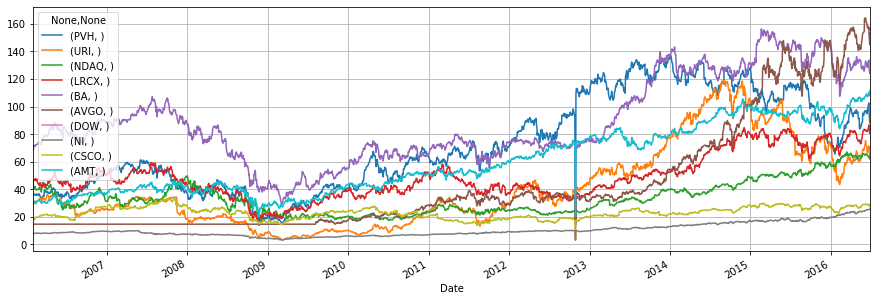

In [19]:
df.plot(y=stocks, figsize=(15,5))
plt.grid()

Text(0.5, 1.0, 'Portfolio interest per year: nan%')

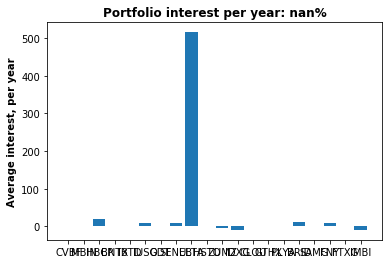

In [11]:
ret = df.iloc[-1].to_numpy()/df.iloc[0].to_numpy()
interest_year = (ret*100 - 100)/dur_years
plt.bar(stocks, interest_year)
plt.ylabel('Average interest, per year', weight='bold')

portfolio_interst_peryear = (df.iloc[-1].to_numpy().sum()/df.iloc[0].to_numpy().sum()*100 - 100)/dur_years
plt.title('Portfolio interest per year: {:.2f}%'.format(portfolio_interst_peryear), weight='bold')

0
[*********************100%***********************]  10 of 10 completed
Duration: 3803 Days (10.4 Years)
1
[*********************100%***********************]  10 of 10 completed

1 Failed download:
- FOX: Data doesn't exist for startDate = 1138546800, endDate = 1467212400
Duration: 3803 Days (10.4 Years)
2
[*********************100%***********************]  10 of 10 completed
Duration: 3803 Days (10.4 Years)
3
[*********************100%***********************]  10 of 10 completed
Duration: 3803 Days (10.4 Years)
4
[*********************100%***********************]  10 of 10 completed
Duration: 3803 Days (10.4 Years)
5
[*********************100%***********************]  10 of 10 completed

1 Failed download:
- DOW: Data doesn't exist for startDate = 1138546800, endDate = 1467212400
Duration: 3803 Days (10.4 Years)
6
[*********************100%***********************]  10 of 10 completed

1 Failed download:
- CARR: Data doesn't exist for startDate = 1138546800, endDate = 1467212400
Durat

60
[*********************100%***********************]  10 of 10 completed
Duration: 3803 Days (10.4 Years)
61
[*********************100%***********************]  10 of 10 completed
Duration: 3803 Days (10.4 Years)
62
[*********************100%***********************]  10 of 10 completed
Duration: 3803 Days (10.4 Years)
63
[*********************100%***********************]  10 of 10 completed

1 Failed download:
- FOXA: Data doesn't exist for startDate = 1138546800, endDate = 1467212400
Duration: 3803 Days (10.4 Years)
64
[*********************100%***********************]  10 of 10 completed
Duration: 3803 Days (10.4 Years)
65
[*********************100%***********************]  10 of 10 completed
Duration: 3803 Days (10.4 Years)
66
[*********************100%***********************]  10 of 10 completed
Duration: 3803 Days (10.4 Years)
67
[*********************100%***********************]  10 of 10 completed
Duration: 3803 Days (10.4 Years)
68
[*********************100%*******************

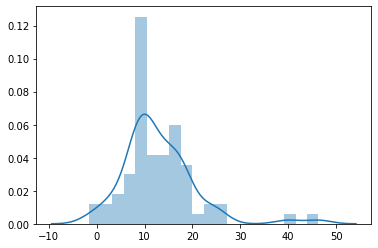

In [5]:
# Set start and end dates
start = datetime.datetime(2006, 1, 30)
end   = datetime.datetime(2016, 6, 30)

bootstrap = []
for i in range(100):
    time.sleep(2)
    print(i)
    stocks = random.sample(SnP, 10) # If you want to grab multiple stocks add more labels to this list
    df = pdr.get_data_yahoo(stocks, start=start, end=end)

    dur_days = (df.index[-1] - df.index[0]).days
    dur_years = dur_days/365
    print('Duration: {} Days ({:.1f} Years)'.format(dur_days, dur_years))

    del df['Adj Close']
    del df['Volume']
    del df['Open']
    del df['Close']
    
    for stock in stocks:
        df[stock] = df.loc[:, pd.IndexSlice[:, stock]].mean(axis=1)

    del df['High']
    del df['Low']
    
    df.fillna(value=df.min(axis=0), inplace=True)

    ret = df.iloc[-1].to_numpy()/df.iloc[0].to_numpy()
    interest_year = (ret*100 - 100)/dur_years
    portfolio_interst_peryear = (df.iloc[-1].to_numpy().sum()/df.iloc[0].to_numpy().sum()*100 - 100)/dur_years
    bootstrap.append(portfolio_interst_peryear)
sns.distplot([x for x in bootstrap if str(x) != 'nan'], bins=20, hist=True)

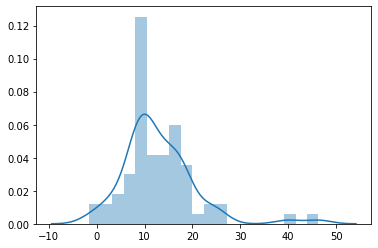

In [6]:
sns.distplot([x for x in bootstrap if str(x) != 'nan'], bins=20, hist=True)

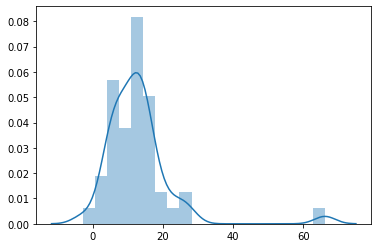

In [17]:
bootstrap1 = bootstrap
sns.distplot([x for x in bootstrap1 if str(x) != 'nan'], bins=20, hist=True)

3545